In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

airports_df = pd.read_csv('../data/2008.csv')

airports_df



,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,17,4,1025.0,1025,1234.0,1237,DL,1207,...,5.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389213,2008,4,17,4,1319.0,1320,1527.0,1524,DL,1208,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389214,2008,4,17,4,1335.0,1335,1556.0,1553,DL,1209,...,7.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389215,2008,4,17,4,1933.0,1935,2140.0,2141,DL,1210,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


# Drop the variables that we don't need:  

In [155]:
airports_df = airports_df.drop(["ArrTime", "ActualElapsedTime", "AirTime", "TaxiIn", "Diverted", "CarrierDelay",
                         "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"], axis=1)
airports_df



,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiOut,Cancelled,CancellationCode
0,2008,1,3,4,1343.0,1325,1435,WN,588,N240WN,70.0,16.0,18.0,HOU,LIT,393,9.0,0,NaN
1,2008,1,3,4,1125.0,1120,1245,WN,1343,N523SW,85.0,2.0,5.0,HOU,MAF,441,8.0,0,NaN
2,2008,1,3,4,2009.0,2015,2140,WN,3841,N280WN,85.0,-4.0,-6.0,HOU,MAF,441,14.0,0,NaN
3,2008,1,3,4,903.0,855,1205,WN,3,N308SA,130.0,-2.0,8.0,HOU,MCO,848,7.0,0,NaN
4,2008,1,3,4,1423.0,1400,1710,WN,25,N462WN,130.0,16.0,23.0,HOU,MCO,848,10.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,17,4,1025.0,1025,1237,DL,1207,N393DA,132.0,-3.0,0.0,BOS,CVG,752,16.0,0,NaN
2389213,2008,4,17,4,1319.0,1320,1524,DL,1208,N952DL,124.0,3.0,-1.0,CVG,BOS,752,12.0,0,NaN
2389214,2008,4,17,4,1335.0,1335,1553,DL,1209,N392DA,138.0,3.0,0.0,BOS,CVG,752,31.0,0,NaN
2389215,2008,4,17,4,1933.0,1935,2141,DL,1210,N3756,126.0,-1.0,-2.0,CVG,BOS,752,12.0,0,NaN


# Feature Engineering: 

# DISCUSS WITH SOO AND TOM. 

In order to can apply PCA any row with 'NAN' value will be deleted. 
Another approach is to replace them with values such as mean, median or the value before or after.  
Source: https://towardsdatascience.com/handling-missing-values-with-pandas-b876bf6f008f#:~:text=fillna()%20function%20of%20Pandas,useful%20for%20time%2Dseries%20datasets.




In [156]:
# Finding missing values: 

airports_df.isna().any()

Year                False
Month               False
DayofMonth          False
DayOfWeek           False
DepTime              True
CRSDepTime          False
CRSArrTime          False
UniqueCarrier       False
FlightNum           False
TailNum              True
CRSElapsedTime       True
ArrDelay             True
DepDelay             True
Origin              False
Dest                False
Distance            False
TaxiOut              True
Cancelled           False
CancellationCode     True
dtype: bool

In [157]:
# Test if we have another kind of missing values not represented by 'NaN'

# EXPLORE THE DATASET AND LOOK THESE CHARACTERS

airports_df.replace({"?": np.nan, "--": np.nan}, inplace=True)
airports_df = airports_df.drop(["CancellationCode"], axis=1)
airports_df


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiOut,Cancelled
0,2008,1,3,4,1343.0,1325,1435,WN,588,N240WN,70.0,16.0,18.0,HOU,LIT,393,9.0,0
1,2008,1,3,4,1125.0,1120,1245,WN,1343,N523SW,85.0,2.0,5.0,HOU,MAF,441,8.0,0
2,2008,1,3,4,2009.0,2015,2140,WN,3841,N280WN,85.0,-4.0,-6.0,HOU,MAF,441,14.0,0
3,2008,1,3,4,903.0,855,1205,WN,3,N308SA,130.0,-2.0,8.0,HOU,MCO,848,7.0,0
4,2008,1,3,4,1423.0,1400,1710,WN,25,N462WN,130.0,16.0,23.0,HOU,MCO,848,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,17,4,1025.0,1025,1237,DL,1207,N393DA,132.0,-3.0,0.0,BOS,CVG,752,16.0,0
2389213,2008,4,17,4,1319.0,1320,1524,DL,1208,N952DL,124.0,3.0,-1.0,CVG,BOS,752,12.0,0
2389214,2008,4,17,4,1335.0,1335,1553,DL,1209,N392DA,138.0,3.0,0.0,BOS,CVG,752,31.0,0
2389215,2008,4,17,4,1933.0,1935,2141,DL,1210,N3756,126.0,-1.0,-2.0,CVG,BOS,752,12.0,0


In [158]:
# Delete each column with all null values: 
airports_df.dropna(axis=1, thresh=10, inplace=True)
airports_df


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiOut,Cancelled
0,2008,1,3,4,1343.0,1325,1435,WN,588,N240WN,70.0,16.0,18.0,HOU,LIT,393,9.0,0
1,2008,1,3,4,1125.0,1120,1245,WN,1343,N523SW,85.0,2.0,5.0,HOU,MAF,441,8.0,0
2,2008,1,3,4,2009.0,2015,2140,WN,3841,N280WN,85.0,-4.0,-6.0,HOU,MAF,441,14.0,0
3,2008,1,3,4,903.0,855,1205,WN,3,N308SA,130.0,-2.0,8.0,HOU,MCO,848,7.0,0
4,2008,1,3,4,1423.0,1400,1710,WN,25,N462WN,130.0,16.0,23.0,HOU,MCO,848,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,17,4,1025.0,1025,1237,DL,1207,N393DA,132.0,-3.0,0.0,BOS,CVG,752,16.0,0
2389213,2008,4,17,4,1319.0,1320,1524,DL,1208,N952DL,124.0,3.0,-1.0,CVG,BOS,752,12.0,0
2389214,2008,4,17,4,1335.0,1335,1553,DL,1209,N392DA,138.0,3.0,0.0,BOS,CVG,752,31.0,0
2389215,2008,4,17,4,1933.0,1935,2141,DL,1210,N3756,126.0,-1.0,-2.0,CVG,BOS,752,12.0,0


In [159]:
# Delete each row with at least one null value: 

airports_df.dropna(axis=0, inplace=True)
airports_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiOut,Cancelled
0,2008,1,3,4,1343.0,1325,1435,WN,588,N240WN,70.0,16.0,18.0,HOU,LIT,393,9.0,0
1,2008,1,3,4,1125.0,1120,1245,WN,1343,N523SW,85.0,2.0,5.0,HOU,MAF,441,8.0,0
2,2008,1,3,4,2009.0,2015,2140,WN,3841,N280WN,85.0,-4.0,-6.0,HOU,MAF,441,14.0,0
3,2008,1,3,4,903.0,855,1205,WN,3,N308SA,130.0,-2.0,8.0,HOU,MCO,848,7.0,0
4,2008,1,3,4,1423.0,1400,1710,WN,25,N462WN,130.0,16.0,23.0,HOU,MCO,848,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,17,4,1025.0,1025,1237,DL,1207,N393DA,132.0,-3.0,0.0,BOS,CVG,752,16.0,0
2389213,2008,4,17,4,1319.0,1320,1524,DL,1208,N952DL,124.0,3.0,-1.0,CVG,BOS,752,12.0,0
2389214,2008,4,17,4,1335.0,1335,1553,DL,1209,N392DA,138.0,3.0,0.0,BOS,CVG,752,31.0,0
2389215,2008,4,17,4,1933.0,1935,2141,DL,1210,N3756,126.0,-1.0,-2.0,CVG,BOS,752,12.0,0


In [160]:
# Check if we have missing values remaining: 

airports_df.isna().any()

Year              False
Month             False
DayofMonth        False
DayOfWeek         False
DepTime           False
CRSDepTime        False
CRSArrTime        False
UniqueCarrier     False
FlightNum         False
TailNum           False
CRSElapsedTime    False
ArrDelay          False
DepDelay          False
Origin            False
Dest              False
Distance          False
TaxiOut           False
Cancelled         False
dtype: bool

# Standardize the Data: 

In [161]:
from sklearn.preprocessing import StandardScaler

# DISCUSS WITH SOO AND TOM: 
# Variables where we apply the PCA: 

features = ['CRSDepTime', 'ArrDelay', 'DepDelay', 'Distance', 'DayOfWeek', 'Month']

# Separating out the features: 
x = airports_df.loc[:, features].values

# Separating out the target: 
y = airports_df.loc[:,['ArrDelay']].values


# Standardizing the features: 
x = StandardScaler().fit_transform(x)





# PCA projection 2D:

In [162]:
from sklearn.decomposition import PCA

# DISCUSS WITH SOO AND TOM the number of components. 

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDF = pd.DataFrame(data = principalComponents,
                          columns = ['principal component 1',
                                    'principal component 2'])

principalDF

,principal component 1,principal component 2
0,0.288426,-0.509434
1,-0.281785,-0.443608
2,-0.262357,-0.460349
3,-0.390718,0.082373
4,0.415371,0.071072
...,...,...
2319114,-0.628210,0.172053
2319115,-0.431869,0.164676
2319116,-0.407129,0.164683
2319117,-0.290916,0.154906


In [163]:
finalDF = pd.concat([principalDF, airports_df[['ArrDelay']]], axis = 1)
finalDF

,principal component 1,principal component 2,ArrDelay
0,0.288426,-0.509434,16.0
1,-0.281785,-0.443608,2.0
2,-0.262357,-0.460349,-4.0
3,-0.390718,0.082373,-2.0
4,0.415371,0.071072,16.0
...,...,...,...
2389212,NaN,NaN,-3.0
2389213,NaN,NaN,3.0
2389214,NaN,NaN,3.0
2389215,NaN,NaN,-1.0


# Visualize 2D Projection: 

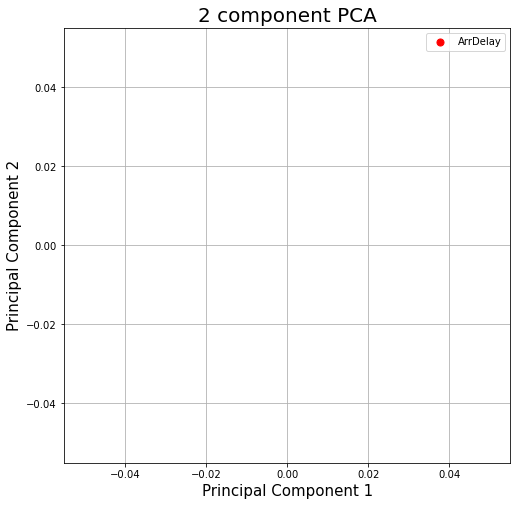

In [166]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['ArrDelay']
colors = ['r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['ArrDelay'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1']
               , finalDF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
